### Creating an AI product
# Example: Predict diabeties

## EDA and data prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Upload the data

Replace the below file name and path to your downloaded location.

In [2]:
df = pd.read_csv('/Users/gillishama/Downloads/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

### Exploratory data analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe() # Describe is for numerical columns only. If you have categorical, you can add: include='all'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Note that appointment autcome is balanced (that is no need to sample data)

### Data preparation


* Looking on df describe there are 0 values (min) in most columns. However, there is no 0 for Glucose, BloodPressure, BloodPressure, SkinThickness, Insulin, BMI. That is 0 indicates missing
* Lets replace all 0 with Nan and then impute their value (only after split to train and test, and by distribution)

In [6]:
# Replace 0 with NaN in: Glucose, BloodPressure, BloodPressure, SkinThickness, Insulin, BMI
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Split df to Train and Test


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'], axis=1)  # Features
y = df['Outcome']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train and y_train are the training features and labels
# X_test and y_test are the testing features and labels


### Visualize the train data

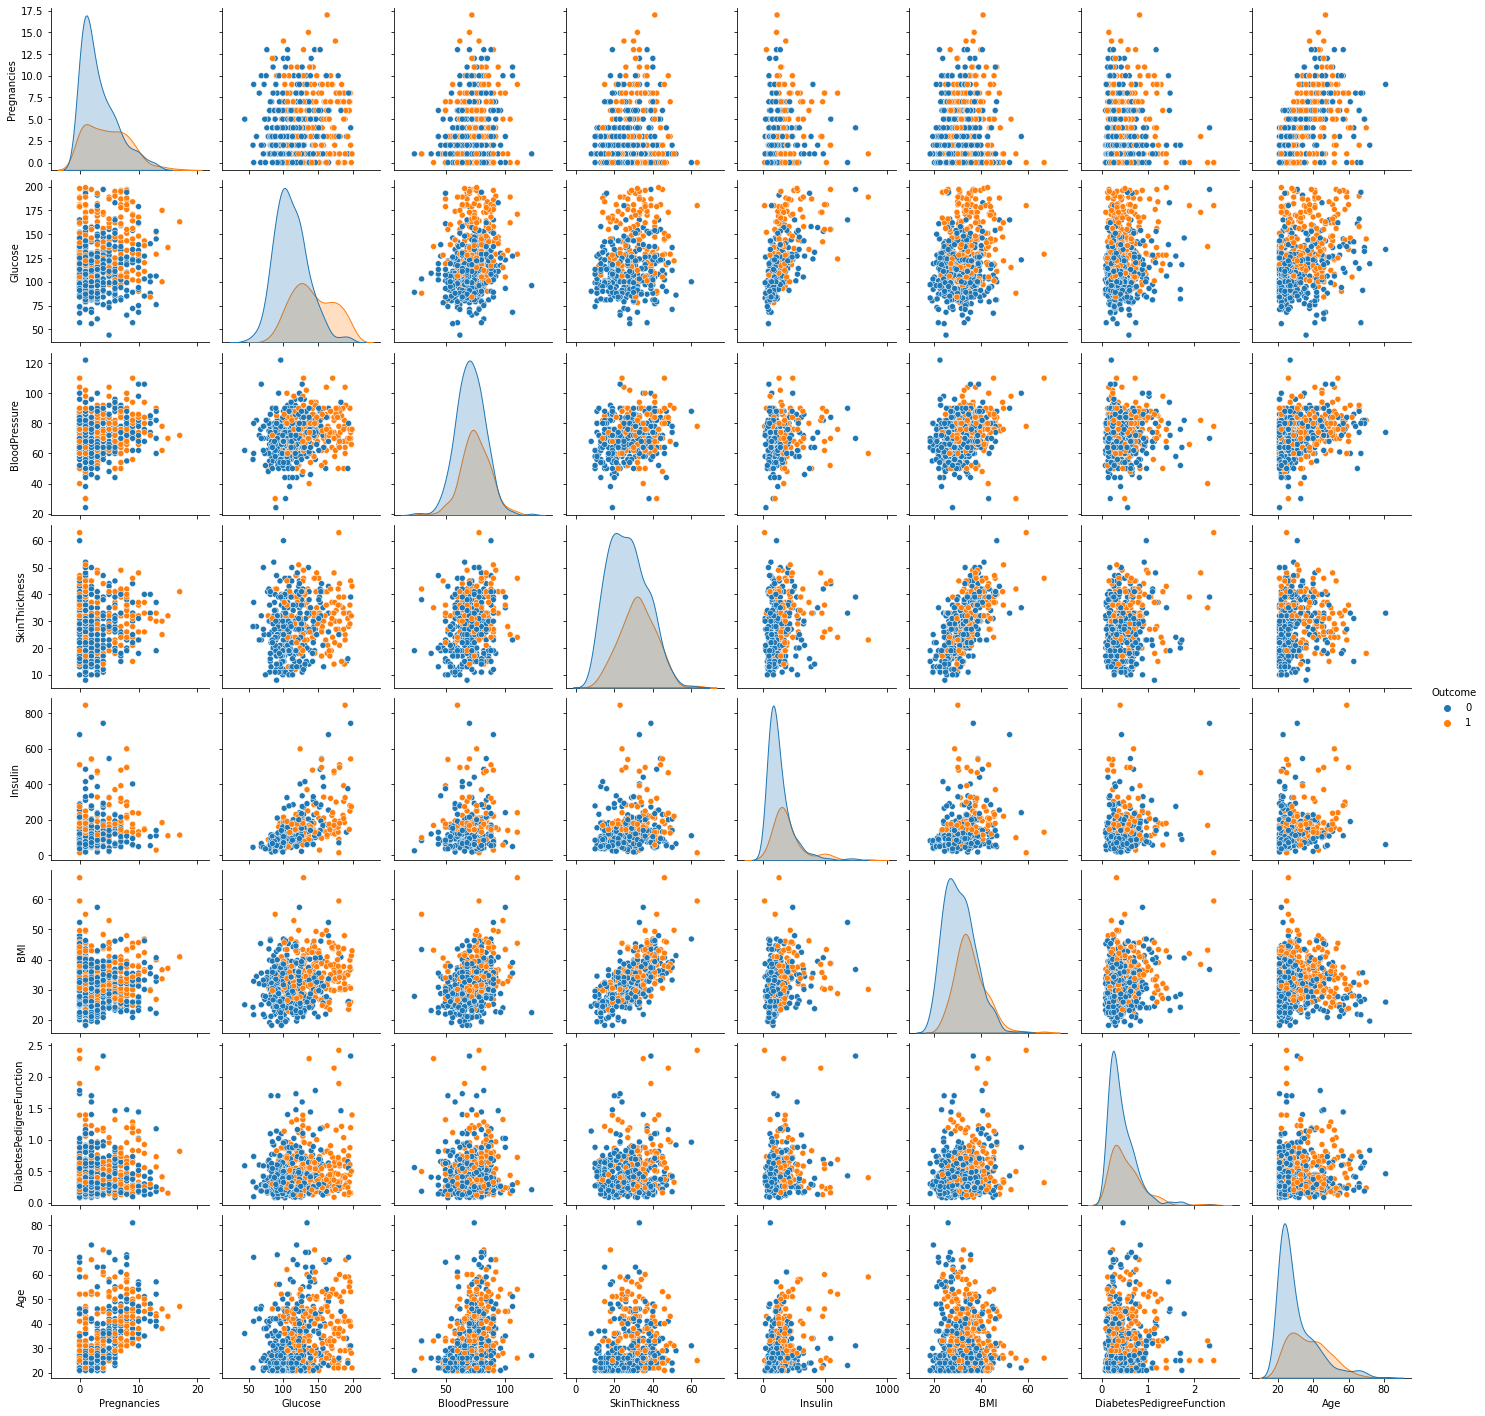

In [10]:
train_data = pd.concat([X_train, y_train], axis=1)
sns.pairplot(train_data, hue = 'Outcome')

### Impute missing values

In [11]:
Glucose_default = X_train['Glucose'].mean()
BloodPressure_default = X_train['BloodPressure'].mean()
SkinThickness_default = X_train['SkinThickness'].median()
Insulin_default = X_train['Insulin'].median()
BMI_default = X_train['BMI'].median()


In [12]:
X_train['Glucose'].fillna(Glucose_default, inplace = True)
X_train['BloodPressure'].fillna(BloodPressure_default, inplace = True)
X_train['SkinThickness'].fillna(SkinThickness_default, inplace = True)
X_train['Insulin'].fillna(Insulin_default, inplace = True)
X_train['BMI'].fillna(BMI_default, inplace = True)

In [13]:
X_test['Glucose'].fillna(Glucose_default, inplace = True)
X_test['BloodPressure'].fillna(BloodPressure_default, inplace = True)
X_test['SkinThickness'].fillna(SkinThickness_default, inplace = True)
X_test['Insulin'].fillna(Insulin_default, inplace = True)
X_test['BMI'].fillna(BMI_default, inplace = True)

## Train and test models

### Model 1 - Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000, random_state=1)

In [15]:
# Fit
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

#### Evaluate results

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,77,22,99
1,16,39,55
All,93,61,154


##### Remember 

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



##### Remember
ROC curve

AUC

Area Under ROC Curve (AUC) =  0.8329660238751148


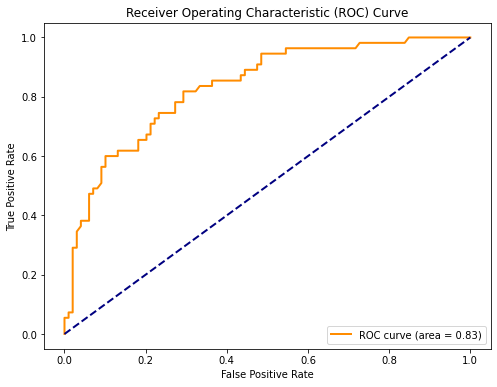

In [19]:
from sklearn.metrics import roc_curve, auc

classifier = rfc



# Make predictions on the test set
y_probabilities = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)
print ('Area Under ROC Curve (AUC) = ', roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model 2 - GBM

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=1000, random_state=1)

In [21]:
# Fit
gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbc.predict(X_test)

In [22]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,71,28,99
1,16,39,55
All,87,67,154


In [24]:
classifier = gbc



# Make predictions on the test set
y_probabilities = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)
print ('Area Under ROC Curve (AUC) = ', roc_auc)

Area Under ROC Curve (AUC) =  0.7873278236914601
